In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [11]:
df = pd.read_csv('phishing.csv', sep=";")

In [12]:
df.shape

(11055, 31)

In [13]:
df.dropna(axis=0, how='all', inplace=True)
df.drop_duplicates()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


In [14]:
df.shape

(11055, 31)

In [15]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWindow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [16]:
df.Result.value_counts()

Result
 1    6157
-1    4898
Name: count, dtype: int64

In [17]:
duplicates = df[df.duplicated(keep=False)]

In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [19]:
X = df.loc[:, 'having_IP_Address': 'Statistical_report']
y_true = df['Result']

In [20]:
feature_names = X.columns
class_names = ['Legitimate', 'Phishing'] # order asc -1, 1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)

(8844, 30)
(2211, 30)


In [23]:
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
classifier.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00761276, 0.        , 0.82149749, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.13129404, 0.02853553,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01106018, 0.        , 0.        , 0.        , 0.        ])

In [25]:
print(tree.export_text(classifier,feature_names=feature_names, class_names=class_names))

|--- SSLfinal_State <= 0.50
|   |--- URL_of_Anchor <= -0.50
|   |   |--- class: Legitimate
|   |--- URL_of_Anchor >  -0.50
|   |   |--- Links_in_tags <= -0.50
|   |   |   |--- class: Legitimate
|   |   |--- Links_in_tags >  -0.50
|   |   |   |--- class: Legitimate
|--- SSLfinal_State >  0.50
|   |--- URL_of_Anchor <= -0.50
|   |   |--- Prefix_Suffix <= 0.00
|   |   |   |--- class: Legitimate
|   |   |--- Prefix_Suffix >  0.00
|   |   |   |--- class: Phishing
|   |--- URL_of_Anchor >  -0.50
|   |   |--- web_traffic <= 0.50
|   |   |   |--- class: Phishing
|   |   |--- web_traffic >  0.50
|   |   |   |--- class: Phishing



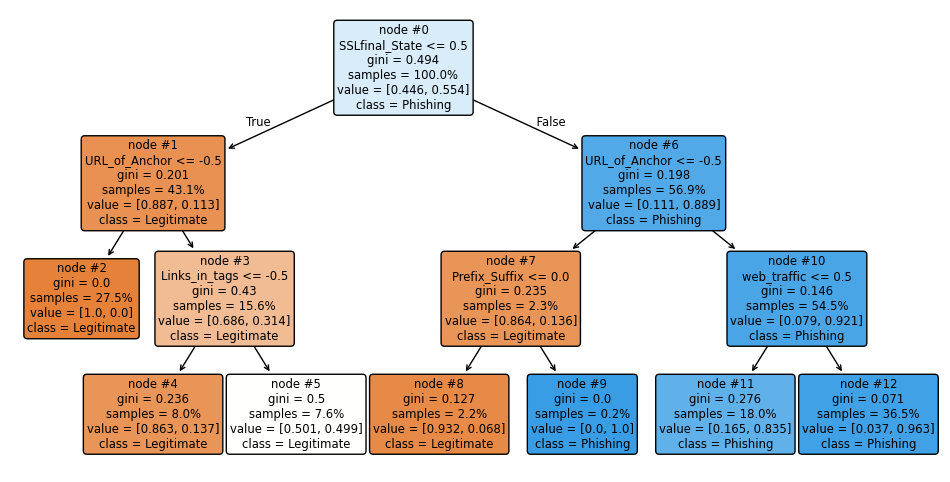

In [26]:
plt.figure(figsize=(12,6))
tree.plot_tree(classifier,feature_names=feature_names, class_names=class_names,
            label='all', # label for gini value
            filled=True, 
            impurity=True, # gini
            node_ids=True, # node id
            proportion=True,
            rounded=True,
            precision=3,
            ax=None,
            fontsize=None
            )  
plt.show()

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [28]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n",matrix)
print("Accuracy calculated from the training set = %.3f (SUBJECT TO OVERFITTING)" % (accuracy))
print(classification_report(y_test, y_pred, target_names=['no','yes']))
y_pred_proba

Confusion matrix:
 [[ 865   91]
 [  99 1156]]
Accuracy calculated from the training set = 0.914 (SUBJECT TO OVERFITTING)
              precision    recall  f1-score   support

          no       0.90      0.90      0.90       956
         yes       0.93      0.92      0.92      1255

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



array([[1.        , 0.        ],
       [0.86299435, 0.13700565],
       [0.50074294, 0.49925706],
       ...,
       [1.        , 0.        ],
       [0.1650973 , 0.8349027 ],
       [0.86299435, 0.13700565]], shape=(2211, 2))

In [29]:
k = 10 
scores = cross_val_score(estimator=classifier, X=X_test, y=y_test, cv=k, scoring='accuracy')
print("Accuracies from %d individual folds:" % k)
print(scores)
print("Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

Accuracies from 10 individual folds:
[0.92792793 0.91402715 0.91855204 0.91855204 0.89140271 0.90497738
 0.92307692 0.90045249 0.90950226 0.92760181]
Accuracy calculated using 10-fold cross validation = 0.914


### Miten kalastelusivuja voi välttää (lyhyesti)
Fishing Websites: We choose 3 important features to determine fishing or not: 
1. SSLfinal_State
2. URL_of_Anchor
3. Prefix_Suffix